# Ejemplo práctico PCA (tecnica de reducción lineal)

Traer información de espacio alta dimensionalidad proyectando en una menor dimensionalidad

# Importar librerias

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

%matplotlib notebook

# Cargar archivo

In [11]:
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv', sep=',')
df.head()

title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3  Hot Summer Cool T-shirt pour les femmes Mode T...   
4  Femmes Shorts d'été à lacets taille élastique ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2  2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3  Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4  Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000               1    3.45          6135   
2            EUR         100               0    3.57            14   
3            EUR        5000               1    4.03           579   
4            EUR         100               1    3.10            20   

   rating_five_count  ...  merchant_rating_count  merchant_rating  \
0               26.0  ...                    568         4.128521   
1             2269.0  ...                  17752         3.899673   
2                5.0  ...                    295         3.989831   
3              295.0  ...                  23832         4.020435   
4                6.0  ...                  14482         4.001588   

                merchant_id  merchant_has_profile_picture  \
0  595097d6a26f6e070cb878d1                             0   
1  56458aa03a698c35c9050988                             0   
2  5d464a1ffdf7bc44ee933c65                             0   
3  58cfdefdacb37b556efdff7c                             0   
4  5ab3b592c3911a095ad5dadb                             0   

   merchant_profile_picture                                      product_url  \
0                       NaN  https://www.wish.com/c/5e9ae51d43d6a96e303acdb0   
1                       NaN  https://www.wish.com/c/58940d436a0d3d5da4e95a38   
2                       NaN  https://www.wish.com/c/5ea10e2c617580260d55310a   
3                       NaN  https://www.wish.com/c/5cedf17ad1d44c52c59e4aca   
4                       NaN  https://www.wish.com/c/5ebf5819ebac372b070b0e70   

                                     product_picture  \
0  https://contestimg.wish.com/api/webimage/5e9ae...   
1  https://contestimg.wish.com/api/webimage/58940...   
2  https://contestimg.wish.com/api/webimage/5ea10...   
3  https://contestimg.wish.com/api/webimage/5cedf...   
4  https://contestimg.wish.com/api/webimage/5ebf5...   

                 product_id   theme crawl_month  
0  5e9ae51d43d6a96e303acdb0  summer     2020-08  
1  58940d436a0d3d5da4e95a38  summer     2020-08  
2  5ea10e2c617580260d55310a  summer     2020-08  
3  5cedf17ad1d44c52c59e4aca  summer     2020-08  
4  5ebf5819ebac372b070b0e70  summer     2020-08  

[5 rows x 43 columns]

# Procesamiento

In [12]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [15]:
# Elejir nuevas columnas
new_df = df[['title', 'price', 'retail_price',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping','merchant_name','merchant_rating']]
new_df.head()

title  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   8.00            22   
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...   8.00            43   
3  Hot Summer Cool T-shirt pour les femmes Mode T...   8.00             8   
4  Femmes Shorts d'été à lacets taille élastique ...   2.72             3   

   units_sold  uses_ad_boosts  rating  rating_count  rating_five_count  \
0         100               0    3.76            54               26.0   
1       20000               1    3.45          6135             2269.0   
2         100               0    3.57            14                5.0   
3        5000               1    4.03           579              295.0   
4         100               1    3.10            20                6.0   

   rating_four_count  rating_three_count  rating_two_count  rating_one_count  \
0                8.0                10.0               1.0               9.0   
1             1027.0              1118.0             644.0            1077.0   
2                4.0                 2.0               0.0               3.0   
3              119.0                87.0              42.0              36.0   
4                4.0                 2.0               2.0               6.0   

   badges_count  badge_local_product  badge_product_quality  \
0             0                    0                      0   
1             0                    0                      0   
2             0                    0                      0   
3             0                    0                      0   
4             0                    0                      0   

   badge_fast_shipping merchant_name  merchant_rating  
0                    0      zgrdejia         4.128521  
1                    0     sarahouse         3.899673  
2                    0        hxt520         3.989831  
3                    0      allenfan         4.020435  
4                    0   happyhorses         4.001588

In [14]:
new_df.describe(include='all')

title        price  \
count                                                1573  1573.000000   
unique                                               1201          NaN   
top     Nouvelle mode d'été femmes robe décontractée c...          NaN   
freq                                                   24          NaN   
mean                                                  NaN     8.325372   
std                                                   NaN     3.932030   
min                                                   NaN     1.000000   
25%                                                   NaN     5.810000   
50%                                                   NaN     8.000000   
75%                                                   NaN    11.000000   
max                                                   NaN    49.000000   

        retail_price     units_sold  uses_ad_boosts       rating  \
count    1573.000000    1573.000000     1573.000000  1573.000000   
unique           NaN            NaN             NaN          NaN   
top              NaN            NaN             NaN          NaN   
freq             NaN            NaN             NaN          NaN   
mean       23.288620    4339.005086        0.432931     3.820896   
std        30.357863    9356.539302        0.495639     0.515374   
min         1.000000       1.000000        0.000000     1.000000   
25%         7.000000     100.000000        0.000000     3.550000   
50%        10.000000    1000.000000        0.000000     3.850000   
75%        26.000000    5000.000000        1.000000     4.110000   
max       252.000000  100000.000000        1.000000     5.000000   

        rating_count  rating_five_count  rating_four_count  \
count    1573.000000        1528.000000        1528.000000   
unique           NaN                NaN                NaN   
top              NaN                NaN                NaN   
freq             NaN                NaN                NaN   
mean      889.659250         442.263743         179.599476   
std      1983.928834         980.203270         400.516231   
min         0.000000           0.000000           0.000000   
25%        24.000000          12.000000           5.000000   
50%       150.000000          79.000000          31.500000   
75%       855.000000         413.500000         168.250000   
max     20744.000000       11548.000000        4152.000000   

        rating_three_count  rating_two_count  rating_one_count  badges_count  \
count          1528.000000       1528.000000       1528.000000   1573.000000   
unique                 NaN               NaN               NaN           NaN   
top                    NaN               NaN               NaN           NaN   
freq                   NaN               NaN               NaN           NaN   
mean            134.549738         63.711387         95.735602      0.105531   
std             311.690656        151.343933        214.075544      0.340709   
min               0.000000          0.000000          0.000000      0.000000   
25%               4.000000          2.000000          4.000000      0.000000   
50%              24.000000         11.000000         20.000000      0.000000   
75%             129.250000         62.000000         94.000000      0.000000   
max            3658.000000       2003.000000       2789.000000      3.000000   

        badge_local_product  badge_product_quality  badge_fast_shipping  \
count           1573.000000            1573.000000          1573.000000   
unique                  NaN                    NaN                  NaN   
top                     NaN                    NaN                  NaN   
freq                    NaN                    NaN                  NaN   
mean               0.018436               0.074380             0.012715   
std                0.134565               0.262472             0.112075   
min                0.000000               0.000000             0.000000   
25%                0.000000             

In [17]:
# sumar todos los nulos
new_df.isna().sum()

title                     0
price                     0
retail_price              0
units_sold                0
uses_ad_boosts            0
rating                    0
rating_count              0
rating_five_count        45
rating_four_count        45
rating_three_count       45
rating_two_count         45
rating_one_count         45
badges_count              0
badge_local_product       0
badge_product_quality     0
badge_fast_shipping       0
merchant_name             4
merchant_rating           0
dtype: int64

In [18]:
# estrategia de eliminar todos los nulos de un dataframer
new_df = new_df.dropna()
new_df.isna().sum()

title                    0
price                    0
retail_price             0
units_sold               0
uses_ad_boosts           0
rating                   0
rating_count             0
rating_five_count        0
rating_four_count        0
rating_three_count       0
rating_two_count         0
rating_one_count         0
badges_count             0
badge_local_product      0
badge_product_quality    0
badge_fast_shipping      0
merchant_name            0
merchant_rating          0
dtype: int64

In [19]:

# verificar el dataset si se realizo la limpieza
# convertir datos categoricos tipo string a numeros
# se debe usar el sklearn

df_ = pd.DataFrame()

# seleccionar los tipos string
columns_ = new_df.select_dtypes(include = "object").columns
labelencoder = LabelEncoder()

# copia del dataframer
df_ = new_df.copy()
for col in columns_:
    df_[col] = labelencoder.fit_transform(df_[col])
    
df_.head()


title  price  retail_price  units_sold  uses_ad_boosts  rating  \
0    153  16.00            14         100               0    3.76   
1    915   8.00            22       20000               1    3.45   
2    139   8.00            43         100               0    3.57   
3    524   8.00             8        5000               1    4.03   
4    390   2.72             3         100               1    3.10   

   rating_count  rating_five_count  rating_four_count  rating_three_count  \
0            54               26.0                8.0                10.0   
1          6135             2269.0             1027.0              1118.0   
2            14                5.0                4.0                 2.0   
3           579              295.0              119.0                87.0   
4            20                6.0                4.0                 2.0   

   rating_two_count  rating_one_count  badges_count  badge_local_product  \
0               1.0               9.0             0                    0   
1             644.0            1077.0             0                    0   
2               0.0               3.0             0                    0   
3              42.0              36.0             0                    0   
4               2.0               6.0             0                    0   

   badge_product_quality  badge_fast_shipping  merchant_name  merchant_rating  
0                      0                    0            863         4.128521  
1                      0                    0            578         3.899673  
2                      0                    0            298         3.989831  
3                      0                    0             24         4.020435  
4                      0                    0            242         4.001588

In [20]:

# verificar si los datos categoricos que estan incluido en el nuevo dt
# representa a los datos real
# selecionar matriz y autor

x = df_.iloc[:, [1,2,3,4,5,6,8,9,10,11,12,13,14,15,16]].values
y = df_.iloc[:,7].values


In [22]:

# Normalizar de los datos fit_transform sobre la matriz de atributos
x = StandardScaler().fit_transform(x)
x


array([[ 1.94132335, -0.3045019 , -0.46214307, ..., -0.28836721,
        -0.1153164 ,  1.48642241],
       [-0.08558154, -0.04307755,  1.63909711, ..., -0.28836721,
        -0.1153164 ,  0.41275256],
       [-0.08558154,  0.64316137, -0.46214307, ..., -0.28836721,
        -0.1153164 , -0.64208097],
       ...,
       [-0.84567087, -0.14111168, -0.46214307, ..., -0.28836721,
        -0.1153164 ,  0.54083949],
       [ 1.18123402, -0.40253604, -0.46214307, ..., -0.28836721,
        -0.1153164 ,  0.04732809],
       [-0.33894465, -0.56592625, -0.46214307, ..., -0.28836721,
        -0.1153164 , -1.69314724]])

# PCA

In [23]:
# Primero definir la cantidad de componente que se desea
# n_components=2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [24]:
Df = pd.DataFrame(data = principalComponents
             ,columns = ['componente principal 0', 'componente principal 1'])
Df.head()

componente principal 0  componente principal 1
0               -1.083158               -0.247712
1                7.237761               -0.995629
2               -1.050470               -0.507703
3               -0.341113               -0.296152
4               -1.133454               -0.872527

In [25]:
Df_ = pd.concat([Df, new_df['merchant_rating']], axis = 1)
Df_.head()

componente principal 0  componente principal 1  merchant_rating
0               -1.083158               -0.247712         4.128521
1                7.237761               -0.995629         3.899673
2               -1.050470               -0.507703         3.989831
3               -0.341113               -0.296152         4.020435
4               -1.133454               -0.872527         4.001588

# Visualización del PCA

<IPython.core.display.Javascript object>


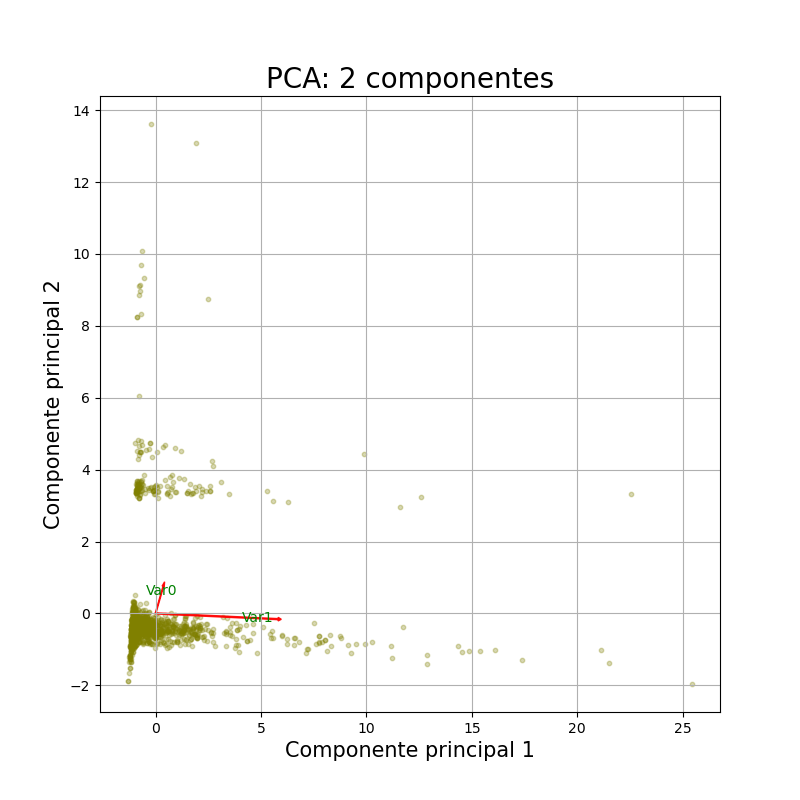

15


In [27]:
# Libreria Kprolit

delay = [0.0,1.0]
color = ['olive'] #'r','g','b','c','m','k','brown','pink','gray','olive','purple','orange','lightblue'

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Componente principal 1', fontsize = 15)
ax.set_ylabel('Componente principal 2', fontsize = 15)
ax.set_title('PCA: 2 componentes', fontsize = 20)

ax.scatter(Df_['componente principal 0'],
           Df_['componente principal 1'],
           c = color,
           s = 10,
           alpha = 0.3)

coeff = np.transpose(pca.components_)
n = coeff.shape[0]
print(n)
for i in [1,2]:
    ax.arrow(0, 0, coeff[i,0]*15, coeff[i,1]*15,color = 'r',alpha = 0.9,head_width = 0.1, width = 0.03, ec ='red')
    ax.text(coeff[i,0]* 12.5, coeff[i,1] * 12.5, "Var"+str(i-1), color = 'g', ha = 'center', va = 'center')
ax.grid()


https://scikit-learn.org/stable/index.html 